### Tinting gray-scale images
[link to example](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py)

In [2]:
import matplotlib.pyplot as plt
import skimage

c:\Users\AdamSz\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


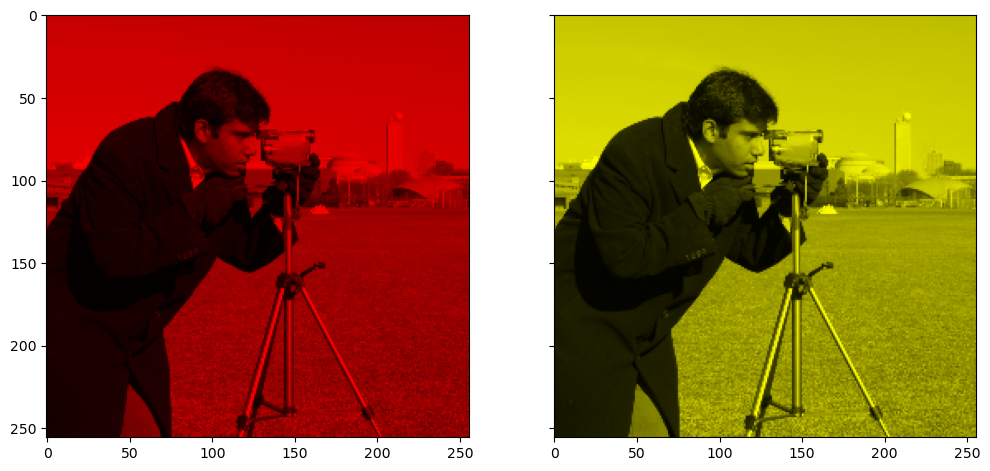

In [3]:
grayscale_image = skimage.img_as_float(skimage.data.camera()[::2, ::2])
image = skimage.color.gray2rgb(grayscale_image)

red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6), sharex=True, sharey=True)

ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)

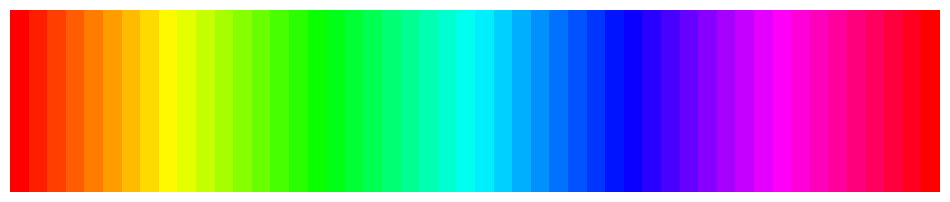

In [4]:
import numpy as np

hue_gradient = np.linspace(0,1)
hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient

all_hues = skimage.color.hsv2rgb(hsv)

fig, ax = plt.subplots(figsize=(12, 6))
# Set image extent so hues go from 0 to 1 and the image is a nice aspect ratio
ax.imshow(all_hues, extent=(
    0 - 0.5 / len(hue_gradient),
    1 + 0.5 / len(hue_gradient), 0, 0.2
))
ax.set_axis_off()

Let's create a litte utility function to take an RGB image and:
1. Transform the RGB image to HSV
2. Set the hue and saturation
3. Transform the HSV image back to RGB

In [5]:
def colorize(image, hue, saturation=1):
    """Add color of the given hue to an RGB image.
    By default, set the saturation to 1 so that the colors pop!
    """

    hsv = skimage.color.rgb2hsv(image)
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return skimage.color.hsv2rgb(hsv)

Using the function above, we plot six images with a linear gradient in the hue and a non-zero saturation:

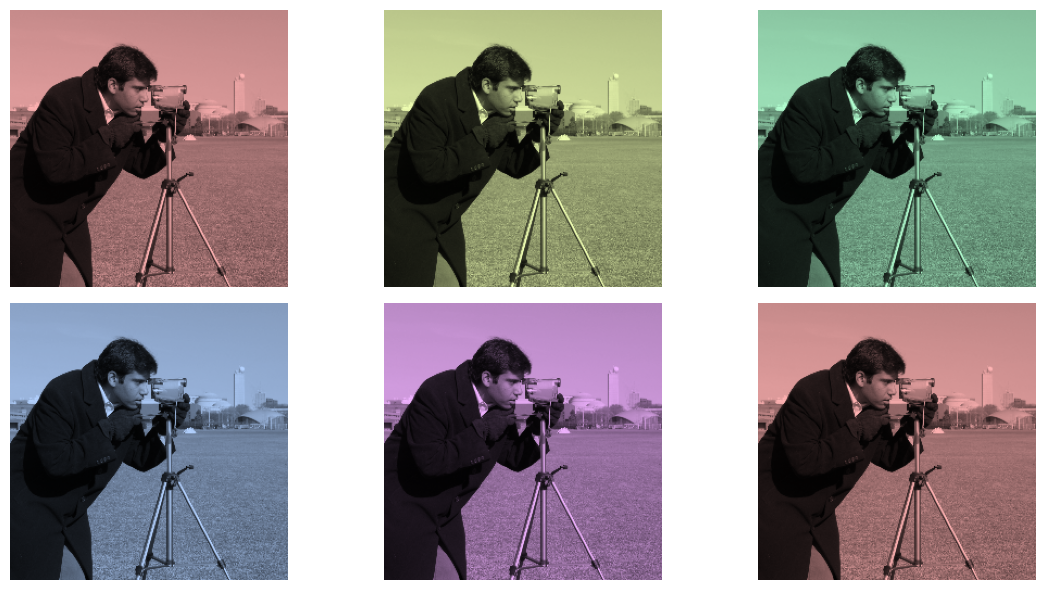

In [6]:
hue_rotations = np.linspace(0, 1, 6)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6), sharex=True, sharey=True)

for ax, hue in zip(axes.flat, hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_image = colorize(image, hue, saturation=0.3)
    ax.imshow(tinted_image, vmin=0, vmax=1)
    ax.set_axis_off()
fig.tight_layout()

You can combine this tinting effect with numpy slicing and fancy-indexing to selectively tint your images.

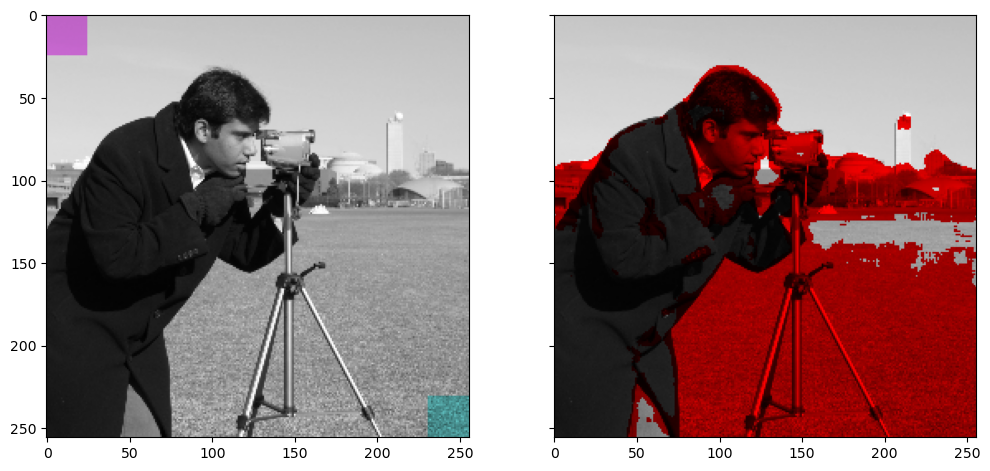

In [7]:
# Square regions defined as slices over the first two dimensions
top_left = (slice(25), ) * 2
bottom_right = (slice(-25, None), ) * 2

sliced_image = image.copy()
sliced_image[top_left] = colorize(image[top_left], 0.82, saturation=0.5)
sliced_image[bottom_right] = colorize(image[bottom_right], 0.5, saturation=0.5)

# Create a mask selecting regions with interesting texture.
noisy = skimage.filters.rank.entropy(skimage.util.img_as_ubyte(grayscale_image), np.ones((9,9)))
textured_regions = noisy > 4.25

# Note that using `colorize` here is a bit more difficult, since `rgb2hsv`
# expects an RGB image (height x width x channel), but fancy-indexing returns
# a set of RGB images (# pixels x channel).
masked_image = image.copy()
masked_image[textured_regions, :] *= red_multiplier

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 6), sharex=True, sharey=True)
ax1.imshow(sliced_image)
ax2.imshow(masked_image)

plt.show()

Let's go back and see how `noisy` and `textured_regions` actually look like:

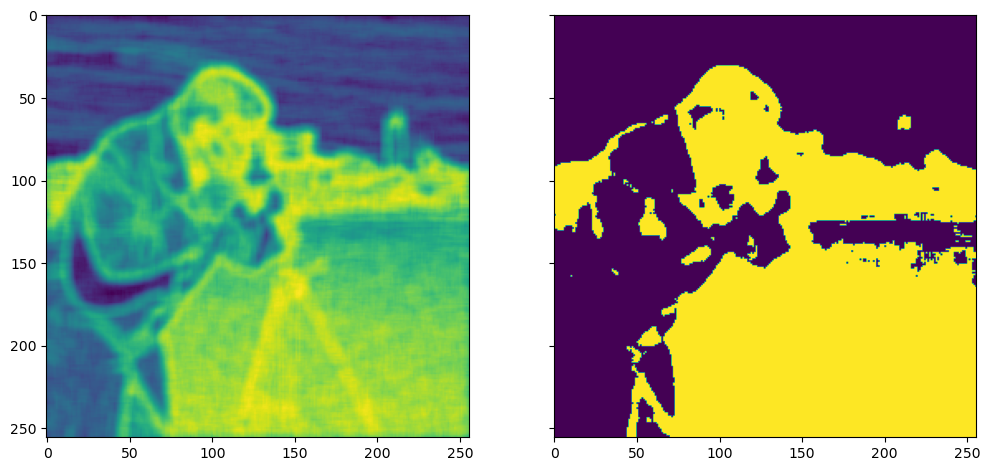

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,6), sharex=True, sharey=True)
ax1.imshow(noisy)
ax2.imshow(textured_regions)